In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$ M(R) = 4\pi q_{b}\rho_{b,0}R^{3}\left(\frac{R}{a_{b}}\right)^{-\alpha_{b}}\int_{0}^{1}dx x^{2-\alpha_{b}} e^{-R^{2}x^{2}/r_{b}^{2}} \\+ 4\pi\rho_{h,0}q_{h}R^{3}\left(\frac{R}{a_{h}}\right)^{-\alpha_{h}}\int_{0}^{1}x^{2-\alpha_{h}}\left(1+\frac{Rx}{a_{h}}\right)^{\alpha_{h}-\beta_{h}}dx \\- 2\pi\Sigma_{d}R_{d}\left[ Re^{-R/R_{d}} + R_{d}e^{R/R_{d}} -R_d \right] + 2\pi\Sigma_{g}\int_{0}^{R} e^{-R'/R_{g}-R_{m}/R'}R'dR'$

In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [12]:
R = np.linspace(0.1,100.,100)

In [21]:
def M_Bulge(R,rho_b,a_b=a_b,r_b=r_b,alpha_b=alpha_b,q_b=q_b):
    def Integral_bulge(x,R):
        t1 = x**(2-alpha_b)
        t2 = np.exp(-R**2.*x**2./r_b**2.)
        t3 = (R/a_b)**(-alpha_b)
        return R**3.*t3*t1*t2
    Integral_bulbo = []
    for i in range(0,len(R)):
        resultado = integrate.quad(Integral_bulge,0,1,args=(R[i]))[0]
        Integral_bulbo.append(resultado)
    return 4.*np.pi*q_b*rho_b*np.array(Integral_bulbo)

In [20]:
def Integral_bulge(x,R):
    t1 = x**(2-alpha_b)
    t2 = np.exp(R**2.*x**2./r_b**2.)
    t3 = (R/a_b)**(-alpha_b)
    return R**3.*t3*t1*t2
Integral_bulbo = []
for i in range(0,len(R_test)):
    resultado = integrate.quad(Integral_bulge,0,1,args=(R[i]))[0]
    Integral_bulbo.append(resultado)
print 4.*np.pi*q_b*rho_b*np.array(Integral_bulbo)

NameError: name 'rho_b' is not defined

In [14]:
R_test=np.linspace(100.,100.,1)
print R_test

[100.]


In [ ]:
def M_Bulge_test(R,rho_b,a_b=a_b,r_b=r_b,alpha_b=alpha_b,q_b=q_b):
    def Integral_bulge(x,R):
        t1 = x**(2-alpha_b)
        t2 = np.exp(R**2.*x**2./r_b**2.)
        t3 = (R/a_b)**(-alpha_b)
        return R**3.*t3*t1*t2
    Integral_bulbo = []
    for i in range(0,len(R)):
        resultado = integrate.quad(Integral_bulge,0,1,args=(R[i]))[0]
        Integral_bulbo.append(resultado)
    return 4.*np.pi*q_b*rho_b*np.array(Integral_bulbo)

In [5]:
def M_DM(R,a_h,rho_h,alpha_h,beta_h,q_h=q_h):
    def integral_DM(x,R):
        t1 = x**(2-alpha_h)
        t2 = (1+R*x/a_h)**(alpha_h-beta_h)
        t3 = (R/a_h)**(-alpha_h)
        return R**3.*t3*t1*t2
    Integral_DMHalo = []
    for i in range(0,len(R)):
        res = integrate.quad(integral_DM,0,1,args=(R[i]))[0]
        Integral_DMHalo.append(res)
    return 4.*np.pi*rho_h*q_h*np.array(Integral_DMHalo)

In [6]:
def M_SD(R,R_d,Sigma_d_SD):
    return -2.*np.pi*Sigma_d_SD*R_d**2.*(R*np.exp(-R/R_d)/R_d + np.exp(-R/R_d) -1)

In [7]:
def M_ISM(R,R_d,Sigma_g_ISM,R_m=R_m):
    def M_g_ISM(u,R):
        return R**2.*u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))
    Integral_M_g = []
    for i in range (0,len(R)):
        result = integrate.quad(M_g_ISM,0,1,args=(R[i]))[0]
        Integral_M_g.append(result)
    return 2.*np.pi*Sigma_g_ISM*np.array(Integral_M_g)

In [8]:
def M_total(R,params):
    rho_b,a_h,rho_h,alpha_h,beta_h,R_d,Sigma_d_SD,Sigma_g_ISM = params
    suma = M_Bulge(R,rho_b) + M_DM(R,a_h,rho_h,alpha_h,beta_h) +  M_SD(R,R_d,Sigma_d_SD) + M_ISM(R,R_d,Sigma_g_ISM)
    return suma

In [9]:
params_I = np.array([rho_b_I,a_h_I,rho_h_I,alpha_h_I,beta_h_I,R_d_I,Sigma_d_SD_I,Sigma_g_ISM_I])
params_II = np.array([rho_b_II,a_h_II,rho_h_II,alpha_h_II,beta_h_II,R_d_II,Sigma_d_SD_II,Sigma_g_ISM_II])

In [22]:
print M_Bulge(R_test,rho_b_I)

[5.17862045e+09]


In [23]:
print M_total(R,params_I)

[2.12523001e+08 6.60526101e+09 1.56576191e+10 2.52912680e+10
 3.53508740e+10 4.57888607e+10 5.64590103e+10 6.72365926e+10
 7.80420496e+10 8.88247868e+10 9.95501869e+10 1.10192964e+11
 1.20734013e+11 1.31158859e+11 1.41456774e+11 1.51620137e+11
 1.61643897e+11 1.71525078e+11 1.81262338e+11 1.90855590e+11
 2.00305673e+11 2.09614094e+11 2.18782823e+11 2.27814135e+11
 2.36710495e+11 2.45474478e+11 2.54108707e+11 2.62615818e+11
 2.70998435e+11 2.79259151e+11 2.87400523e+11 2.95425065e+11
 3.03335246e+11 3.11133490e+11 3.18822179e+11 3.26403649e+11
 3.33880193e+11 3.41254063e+11 3.48527468e+11 3.55702577e+11
 3.62781517e+11 3.69766371e+11 3.76659186e+11 3.83461962e+11
 3.90176661e+11 3.96805203e+11 4.03349463e+11 4.09811277e+11
 4.16192439e+11 4.22494701e+11 4.28719771e+11 4.34869320e+11
 4.40944976e+11 4.46948325e+11 4.52880915e+11 4.58744255e+11
 4.64539815e+11 4.70269025e+11 4.75933280e+11 4.81533937e+11
 4.87072319e+11 4.92549712e+11 4.97967369e+11 5.03326509e+11
 5.08628318e+11 5.138739

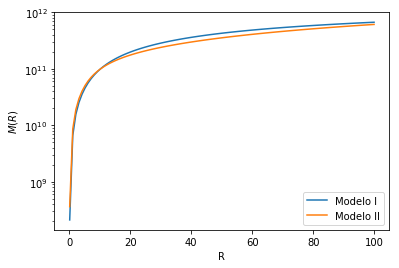

In [25]:
plt.plot(R,M_total(R,params_I),label='Modelo I')
plt.plot(R,M_total(R,params_II),label='Modelo II')
plt.ylabel(r'$M(R)$')
plt.xlabel('R')
plt.legend(loc='lower right', prop={'size':10})
plt.yscale('log')
plt.savefig('Mass_I_II.pdf')

In [26]:
print M_total(R,params_II)

[3.64435454e+08 8.63526142e+09 1.89553417e+10 2.95031785e+10
 4.00851944e+10 5.06210692e+10 6.09803744e+10 7.10662283e+10
 8.08307737e+10 9.02601034e+10 9.93603672e+10 1.08148642e+11
 1.16647249e+11 1.24880322e+11 1.32871824e+11 1.40644466e+11
 1.48219197e+11 1.55615020e+11 1.62849002e+11 1.69936386e+11
 1.76890748e+11 1.83724168e+11 1.90447404e+11 1.97070041e+11
 2.03600641e+11 2.10046858e+11 2.16415552e+11 2.22712879e+11
 2.28944376e+11 2.35115025e+11 2.41229318e+11 2.47291307e+11
 2.53304653e+11 2.59272664e+11 2.65198333e+11 2.71084368e+11
 2.76933224e+11 2.82747124e+11 2.88528085e+11 2.94277938e+11
 2.99998346e+11 3.05690822e+11 3.11356742e+11 3.16997359e+11
 3.22613818e+11 3.28207165e+11 3.33778354e+11 3.39328262e+11
 3.44857692e+11 3.50367385e+11 3.55858020e+11 3.61330226e+11
 3.66784584e+11 3.72221633e+11 3.77641873e+11 3.83045770e+11
 3.88433758e+11 3.93806244e+11 3.99163608e+11 4.04506209e+11
 4.09834383e+11 4.15148448e+11 4.20448705e+11 4.25735438e+11
 4.31008917e+11 4.362694

$$\begin{equation}
\begin{split}
    \Sigma (R) = \sqrt{1-e^{2}}\rho_{b,0}\left(\frac{R}{a_{h}}\right)^{-\alpha_{b}}R\int_{0}^{1}\frac{x^{1-\alpha_{b}}e^{-R^{2}x^{2}/r_{b}^{2}}}{\sqrt{x^{2}-e^{2}}}dx \\+ \sqrt{1-e^{2}}\rho_{h,0}\left(\frac{R}{a_{h}}\right)^{-\alpha_{h}}R\int_{0}^{1} \frac{x^{1-\alpha_{h}}\left(1+\frac{Rx}{a_{h}}\right)^{\alpha_{h}-\beta_{h}}}{\sqrt{x^{2}-e^{2}}}dx \\+ \Sigma_{d}e^{-R/R_{d}} + \Sigma_{g}e^{-R/R_{g}-R_{m}/R}.
    \end{split}
    \label{eq:SigmaRTotal}
\end{equation}
$$

In [101]:
def Sigma_Bulge(R,rho_b,a_b=a_b,r_b=r_b,alpha_b=alpha_b,q_b=q_b):
    def Int_sigma(x,R):
        n = x**(1.-alpha_b)*np.exp(-R**2.*x**2./r_b**2.)
        d = np.sqrt(x**2. - 1. + q_b**2.)
        t1 = (R/a_b)**(-alpha_b)
        return t1*R*n/d
    Int = []
    for i in range(0,len(R)):
        res = integrate.quad(Int_sigma,0.9,1.1,args=(R[i]))[0]
        Int.append(res)
    return rho_b*q_b*np.array(Int)

In [102]:
def Sigma_DM(R,rho_h,a_h,alpha_h,beta_h,q_h=q_h):
    def Int_sig_Halo(x,R):
        n = x**(1-alpha_h)*(1.+R*x/a_h)**(alpha_h-beta_h)
        d = np.sqrt(x**2.-1.+q_h**2.)
        t1 = (R/a_h)**(-alpha_h)
        return t1*R*n/d
    Int_Halo = []
    for i in range(0,len(R)):
        res = integrate.quad(Int_sig_Halo,0.9,1.1,args=(R[i]))[0]
        Int_Halo.append(res)
    return q_h*rho_h*np.array(Int_Halo)

In [87]:
def Sigma_SD(R,R_d,Sigma_d):
    return Sigma_d*np.exp(-R/R_d)

In [88]:
def Sigma_ISM(R,R_d,Sigma_g,R_m=R_m):
    return Sigma_g*np.exp(-R/(2.*R_d)-R_m/R)

In [103]:
def Sigma_tot(R,params):
    rho_b,rho_h,a_h,alpha_h,beta_h,R_d,Sigma_d,Sigma_g = params
    suma = Sigma_Bulge(R,rho_b) + Sigma_DM(R,rho_h,a_h,alpha_h,beta_h) + Sigma_SD(R,R_d,Sigma_d) + Sigma_ISM(R,R_d,Sigma_g)
    return suma

In [112]:
params_I_sigma = np.array([rho_b_I,rho_h_I,a_h_I,alpha_h_I,beta_h_I,R_d_I,Sigma_d_SD_I,Sigma_g_ISM_I])
params_II_sigma = np.array([rho_b_II,rho_h_II,a_h_II,alpha_h_II,beta_h_II,R_d_II,Sigma_d_SD_II,Sigma_g_ISM_II])

In [90]:
Rpeq = np.linspace(0.1,1.1,50)
print Rpeq

[0.1        0.12040816 0.14081633 0.16122449 0.18163265 0.20204082
 0.22244898 0.24285714 0.26326531 0.28367347 0.30408163 0.3244898
 0.34489796 0.36530612 0.38571429 0.40612245 0.42653061 0.44693878
 0.46734694 0.4877551  0.50816327 0.52857143 0.54897959 0.56938776
 0.58979592 0.61020408 0.63061224 0.65102041 0.67142857 0.69183673
 0.7122449  0.73265306 0.75306122 0.77346939 0.79387755 0.81428571
 0.83469388 0.85510204 0.8755102  0.89591837 0.91632653 0.93673469
 0.95714286 0.97755102 0.99795918 1.01836735 1.03877551 1.05918367
 1.07959184 1.1       ]


In [94]:
R_1 = np.linspace(1.1,8.,50)
Rp = np.linspace(6.9,9.1,50)

In [108]:
print Rp

[6.9        6.94489796 6.98979592 7.03469388 7.07959184 7.1244898
 7.16938776 7.21428571 7.25918367 7.30408163 7.34897959 7.39387755
 7.43877551 7.48367347 7.52857143 7.57346939 7.61836735 7.66326531
 7.70816327 7.75306122 7.79795918 7.84285714 7.8877551  7.93265306
 7.97755102 8.02244898 8.06734694 8.1122449  8.15714286 8.20204082
 8.24693878 8.29183673 8.33673469 8.38163265 8.42653061 8.47142857
 8.51632653 8.56122449 8.60612245 8.65102041 8.69591837 8.74081633
 8.78571429 8.83061224 8.8755102  8.92040816 8.96530612 9.01020408
 9.05510204 9.1       ]


In [113]:
print Sigma_tot(Rp,params_I_sigma),Sigma_tot(Rp,params_II_sigma)

[1.12287622e+08 1.10903589e+08 1.09541554e+08 1.08201116e+08
 1.06881878e+08 1.05583455e+08 1.04305467e+08 1.03047543e+08
 1.01809319e+08 1.00590436e+08 9.93905455e+07 9.82093034e+07
 9.70463734e+07 9.59014255e+07 9.47741361e+07 9.36641881e+07
 9.25712705e+07 9.14950784e+07 9.04353128e+07 8.93916807e+07
 8.83638945e+07 8.73516725e+07 8.63547385e+07 8.53728213e+07
 8.44056553e+07 8.34529800e+07 8.25145399e+07 8.15900845e+07
 8.06793681e+07 7.97821497e+07 7.88981931e+07 7.80272665e+07
 7.71691429e+07 7.63235991e+07 7.54904168e+07 7.46693816e+07
 7.38602831e+07 7.30629153e+07 7.22770758e+07 7.15025663e+07
 7.07391922e+07 6.99867627e+07 6.92450905e+07 6.85139920e+07
 6.77932871e+07 6.70827991e+07 6.63823547e+07 6.56917838e+07
 6.50109195e+07 6.43395984e+07] [92044667.09230246 91177086.5209716  90319307.7845654  89471207.67639747
 88632664.73154199 87803559.19383524 86983772.98406613 86173189.66927719
 85371694.43310405 84579174.0470882  83795516.84290181 83020612.68542966
 82254352.9466574

In [114]:
print Rp[25],Sigma_tot(Rp,params_I_sigma)[25],Sigma_tot(Rp,params_II_sigma)[25]

8.022448979591836 83452980.01123694 73032786.9080869


In [127]:
sum(Sigma_tot(Rp,params_I_sigma))/len(Rp),sum(Sigma_tot(Rp,params_II_sigma))/len(Rp)

(85439316.3831039, 74128865.30684295)

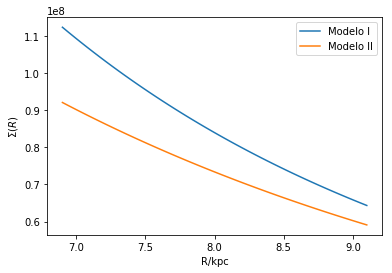

In [124]:
plt.plot(Rp,Sigma_tot(Rp,params_I_sigma),label='Modelo I')
plt.plot(Rp,Sigma_tot(Rp,params_II_sigma),label='Modelo II')
plt.xlabel('R/kpc')
plt.ylabel(r'$\Sigma(R)$')
plt.legend(loc='upper right', prop={'size':10})
#plt.yscale('log')
plt.savefig('Sigma_I_II.pdf')